# It's a Dream Come True...

You know how to develop video games, awesome! But now that you know how to do something you love, you must figure out how to get PAID to do something you love. As the data geek you are, you decide to analyze some data to help determine what your focus should be for your video game career. 

Lucky you! Kaggle has just the data set you need ([link to Kaggle data](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?resource=download)). It's pretty cool that Kaggle was able to use this data that originally came from  Timo Poutanen at the University of Helsinki ([link to Original data source](https://zenodo.org/record/2454579#.Y9Y2c9JBwUE)). 

But what should you figure out to make a more informed decision? You know you're willing to move for that dream job so you need to explore data from all over the world. 

Ultimately you decide you'd like to know:
* What video game genre is the most popular worldwide? *(So you can know what you're most likely to build)* 
* What video game genre is the most popular from region to region *(So you know where to live if you want to build your favorite type, puzzle games!)* 
* What does video game genre popularity look like over time? *(So you know if you have job security)*
* What publisher has the most global sales? *(So you can find them on LinkedIn and see if they're hiring)* 
* What publishers are the most popular region to region? *(So you know where to move to chase that money!)*

So you settle in, put on your favorite [video game spotify playlist](https://open.spotify.com/playlist/3aI7ztMmDhMHhYe1KOPFLG?si=b0c47f2577f14549) and get to work dissecting this data just like Link would.  

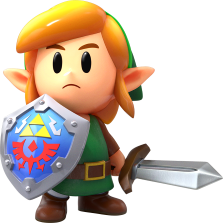


___
___

### Outline:

This data evaluation is broken out into the following sections:
1. Cleaning the data
2. Anwsering the questions
3. Making cool graphs 
4. Final notes and thoughts

___
___

In [36]:
#packages needed

import pandas as pd
from pathlib import Path

In [37]:
#reading in the data 

raw_data = Path('data/raw-data.csv')
vg_df = pd.read_csv(raw_data)

### Cleaning the data

First things first, you notice there are some columns in this nice raw data set that just might be a little messy when you're trying to vizualize everything. Let's get rid of those:

**Columns to Keep:** Name, Year_of_Release, Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global Sales, Publisher

**Columns to Remove:** Platform, Critic_Score, User_Score, User_Count, Developer, Rating, Critic_Count

In [38]:
#dropping columns 
clean_df = vg_df.drop(['Critic_Score', 'User_Score', 'User_Count', 'Developer', 'Rating', "Critic_Count", 'Platform'], axis=1)
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Next, you know that you should eliminate any null values from your data set. So you take a look to see what might need to be removed: 

In [39]:
#checking for null data to remove
clean_df.isnull().sum().sort_values(ascending=False)

Year_of_Release    269
Publisher           54
Name                 2
Genre                2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

You know you'd like to look at Year of Release, Publisher, and Genre, so you remove those null values to have a nice complete and clean data set to work from. 

In [40]:
#dropping any NA values from the dataframe
clean_df.dropna(axis=0, inplace=True)

#verifying there are no null values remaining
clean_df.isnull().sum().sort_values(ascending=False)

Name               0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [41]:
#seeing what the resulting dataset now looks like 
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Year_of_Release  16416 non-null  float64
 2   Genre            16416 non-null  object 
 3   Publisher        16416 non-null  object 
 4   NA_Sales         16416 non-null  float64
 5   EU_Sales         16416 non-null  float64
 6   JP_Sales         16416 non-null  float64
 7   Other_Sales      16416 non-null  float64
 8   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


In [42]:
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


One last thing is to make the Year of Release look a little cleaner

In [43]:
clean_df['Year_of_Release'] = clean_df['Year_of_Release'].astype('int')
clean_df.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Cleaning Summary:  

In total, you cleaned a few items from the original raw file:

1. Removed unnecessary columns from the dataframe 
2. Removed null values found in the Year_of_Release, Name, Publisher, and Genre columns. This left the final data set as 16416 rows and 9 columns
2. Update the Year_of_Release column from a float to an int

___
___

### Anwsering the Questions

Know that you have a clean data set to work from, it's time to find your inner Mario, update your [playlist](https://open.spotify.com/album/3bBCofH4VxHokZ6fRCgbGx?si=MbjwLo_CQtWKkpAHI749PQ) and get into the nitty gritty. 

**Let's a go!**

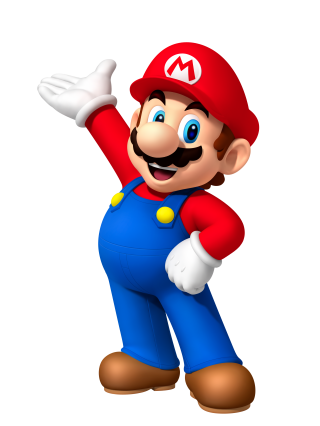

* What video game genre is the most popular worldwide? 
* What video game genre is the most popular from region to region 
* What does video game genre popularity look like over time? 
* What publisher has the most global sales? 
* What publishers are the most popular region to region? 